 # Yu Hao yh3252 N11861972 Week2 Assignment2

## Step 1-3 Perceptron and Adaline Code

In [ ]:
import numpy as np
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [ ]:
import numpy as np

class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep 14 15:00:15 2019

@author: Sumail
"""
import numpy as np
class AdalineSGD(object):
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# Linearly Separable

## Step 4-Two Features Input

       0    1    2    3               4
40   5.0  3.5  1.3  0.3     Iris-setosa
41   4.5  2.3  1.3  0.3     Iris-setosa
42   4.4  3.2  1.3  0.2     Iris-setosa
43   5.0  3.5  1.6  0.6     Iris-setosa
44   5.1  3.8  1.9  0.4     Iris-setosa
45   4.8  3.0  1.4  0.3     Iris-setosa
46   5.1  3.8  1.6  0.2     Iris-setosa
47   4.6  3.2  1.4  0.2     Iris-setosa
48   5.3  3.7  1.5  0.2     Iris-setosa
49   5.0  3.3  1.4  0.2     Iris-setosa
100  6.3  3.3  6.0  2.5  Iris-virginica
101  5.8  2.7  5.1  1.9  Iris-virginica
102  7.1  3.0  5.9  2.1  Iris-virginica
103  6.3  2.9  5.6  1.8  Iris-virginica
104  6.5  3.0  5.8  2.2  Iris-virginica
105  7.6  3.0  6.6  2.1  Iris-virginica
106  4.9  2.5  4.5  1.7  Iris-virginica
107  7.3  2.9  6.3  1.8  Iris-virginica
108  6.7  2.5  5.8  1.8  Iris-virginica
109  7.2  3.6  6.1  2.5  Iris-virginica


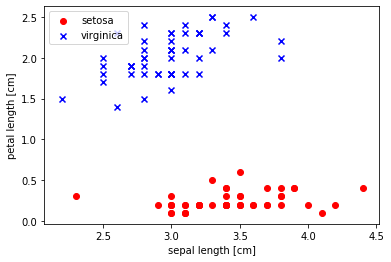

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df1 = df[0:50]
df2 = df[100:150]
df = pd.concat([df1,df2])
print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [1, 3]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()


## Step 4-Two Features Training of Perceptron and Adaline

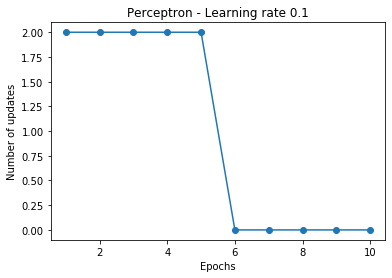

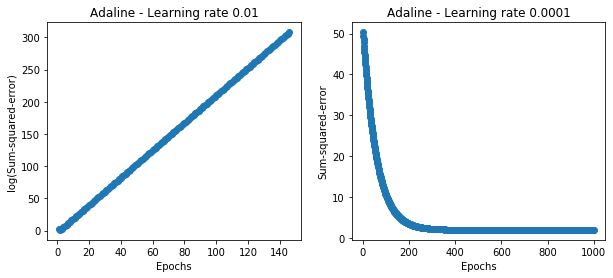

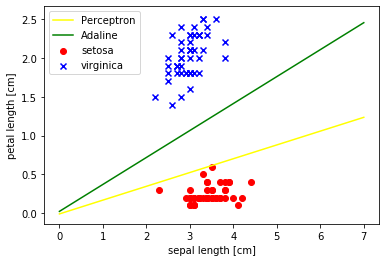

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep  7 17:59:04 2019

@author: Sumail
"""
import Perceptron 
import matplotlib.pyplot as plt
import numpy as np
import AdalineGD
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df1 = df[0:50]
df2 = df[100:150]
df = pd.concat([df1,df2])
#print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [1, 3]].values
ppn = Perceptron.Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)



plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron - Learning rate 0.1')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()




fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD.AdalineGD(n_iter=1000, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD.AdalineGD(n_iter=1000, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

x_1 = np.linspace(0,7,10)
y_2 =-(ada2.w_[1]*x_1 + ada2.w_[0])/ada2.w_[2]

x_3 = np.linspace(0,7,10)
y_4 =-(ppn.w_[1]*x_3 + ppn.w_[0])/ppn.w_[2]
plt.plot(x_3,y_4,color = 'yellow', label='Perceptron')
plt.plot(x_1,y_2,color = 'green', label='Adaline')
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## Step 5-Three Features Input

       0    1    2    3               4
40   5.0  3.5  1.3  0.3     Iris-setosa
41   4.5  2.3  1.3  0.3     Iris-setosa
42   4.4  3.2  1.3  0.2     Iris-setosa
43   5.0  3.5  1.6  0.6     Iris-setosa
44   5.1  3.8  1.9  0.4     Iris-setosa
45   4.8  3.0  1.4  0.3     Iris-setosa
46   5.1  3.8  1.6  0.2     Iris-setosa
47   4.6  3.2  1.4  0.2     Iris-setosa
48   5.3  3.7  1.5  0.2     Iris-setosa
49   5.0  3.3  1.4  0.2     Iris-setosa
100  6.3  3.3  6.0  2.5  Iris-virginica
101  5.8  2.7  5.1  1.9  Iris-virginica
102  7.1  3.0  5.9  2.1  Iris-virginica
103  6.3  2.9  5.6  1.8  Iris-virginica
104  6.5  3.0  5.8  2.2  Iris-virginica
105  7.6  3.0  6.6  2.1  Iris-virginica
106  4.9  2.5  4.5  1.7  Iris-virginica
107  7.3  2.9  6.3  1.8  Iris-virginica
108  6.7  2.5  5.8  1.8  Iris-virginica
109  7.2  3.6  6.1  2.5  Iris-virginica


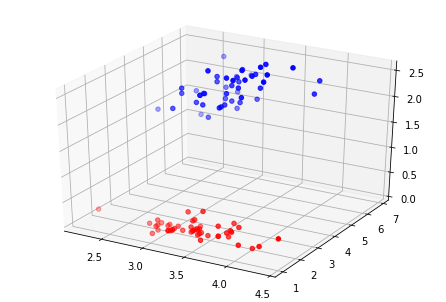

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df1 = df[0:50]
df2 = df[100:150]
df = pd.concat([df1,df2])
print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [1,2,3]].values

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:50, 0], X[:50, 1], X[:50, 2],c = 'red')
ax.scatter(X[50:100, 0], X[50:100, 1], X[50:100, 2],c = 'blue')
'''
# plot data
plt.scatter(X[:50, 0], X[:50, 1], X[:50, 2],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], X[50:100, 2],
            color='blue', marker='x', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

#plt.savefig('images/02_06.png', dpi=300)'''
plt.show()

## Step 5-Three Features Training of Perceptron and Adaline

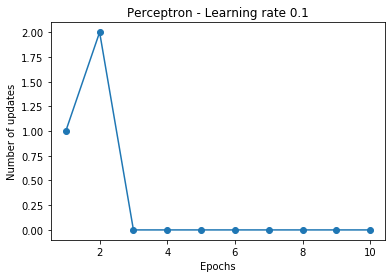

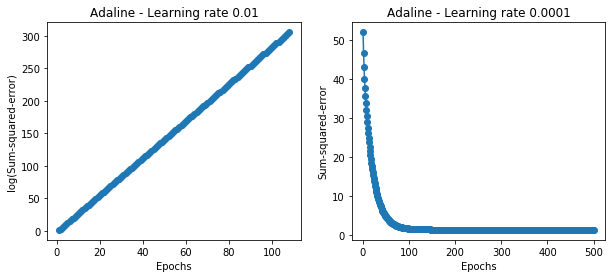

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep  7 17:59:04 2019

@author: Sumail
"""
import Perceptron 
import matplotlib.pyplot as plt
import numpy as np
import AdalineGD
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df1 = df[0:50]
df2 = df[100:150]
df = pd.concat([df1,df2])
#print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [1,2,3]].values
ppn = Perceptron.Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron - Learning rate 0.1')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD.AdalineGD(n_iter=500, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD.AdalineGD(n_iter=500, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

## Step 6-Four Features Training Perceptron and Adaline

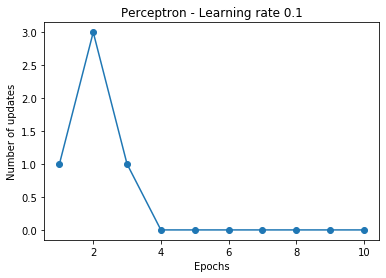

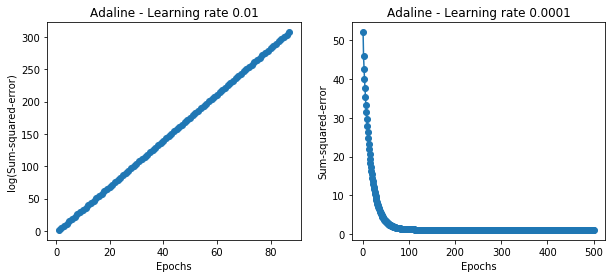

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep  7 17:59:04 2019

@author: Sumail
"""
import Perceptron 
import matplotlib.pyplot as plt
import numpy as np
import AdalineGD
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df1 = df[0:50]
df2 = df[100:150]
df = pd.concat([df1,df2])
#print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0,1,2,3]].values
ppn = Perceptron.Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron - Learning rate 0.1')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD.AdalineGD(n_iter=500, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD.AdalineGD(n_iter=500, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

# NOT Linearly Separable

## Step 7-Two Features Input

       0    1    2    3                4
90   5.5  2.6  4.4  1.2  Iris-versicolor
91   6.1  3.0  4.6  1.4  Iris-versicolor
92   5.8  2.6  4.0  1.2  Iris-versicolor
93   5.0  2.3  3.3  1.0  Iris-versicolor
94   5.6  2.7  4.2  1.3  Iris-versicolor
95   5.7  3.0  4.2  1.2  Iris-versicolor
96   5.7  2.9  4.2  1.3  Iris-versicolor
97   6.2  2.9  4.3  1.3  Iris-versicolor
98   5.1  2.5  3.0  1.1  Iris-versicolor
99   5.7  2.8  4.1  1.3  Iris-versicolor
100  6.3  3.3  6.0  2.5   Iris-virginica
101  5.8  2.7  5.1  1.9   Iris-virginica
102  7.1  3.0  5.9  2.1   Iris-virginica
103  6.3  2.9  5.6  1.8   Iris-virginica
104  6.5  3.0  5.8  2.2   Iris-virginica
105  7.6  3.0  6.6  2.1   Iris-virginica
106  4.9  2.5  4.5  1.7   Iris-virginica
107  7.3  2.9  6.3  1.8   Iris-virginica
108  6.7  2.5  5.8  1.8   Iris-virginica
109  7.2  3.6  6.1  2.5   Iris-virginica


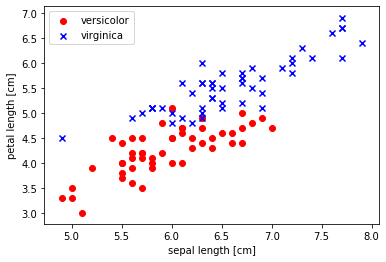

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df1 = df[50:100]
df2 = df[100:150]
df = pd.concat([df1,df2])
print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values
'''
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:50, 0], X[:50, 1], X[:50, 2],c = 'red')
ax.scatter(X[50:100, 0], X[50:100, 1], X[50:100, 2],c = 'blue')
'''
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='versicolor')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

#plt.savefig('images/02_06.png', dpi=300)
plt.show()

## Step 7-Two Features Training of Perceptron and Adaline

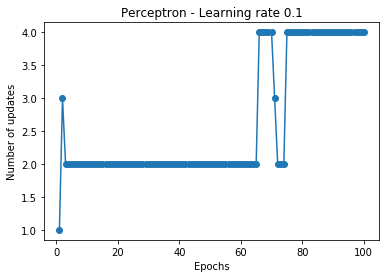

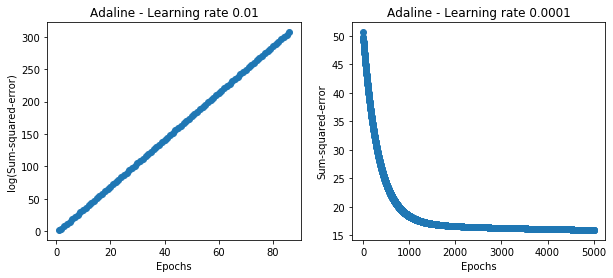

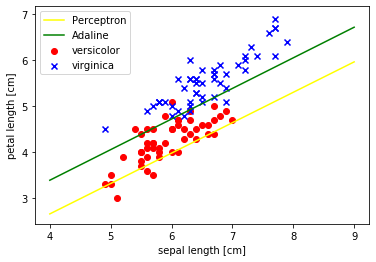

In [28]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep  7 17:59:04 2019

@author: Sumail
"""
import Perceptron 
import matplotlib.pyplot as plt
import numpy as np
import AdalineGD
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df1 = df[50:100]
df2 = df[100:150]
df = pd.concat([df1,df2])
#print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0,2]].values
ppn = Perceptron.Perceptron(eta=0.1, n_iter=100)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron - Learning rate 0.1')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD.AdalineGD(n_iter=5000, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD.AdalineGD(n_iter=5000, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()
x_1 = np.linspace(4,9,10)
y_2 =-(ada2.w_[1]*x_1 + ada2.w_[0])/ada2.w_[2]

x_3 = np.linspace(4,9,10)
y_4 =-(ppn.w_[1]*x_3 + ppn.w_[0])/ppn.w_[2]
plt.plot(x_3,y_4,color = 'yellow', label='Perceptron')
plt.plot(x_1,y_2,color = 'green', label='Adaline')
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='versicolor')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## Step 8-Three Features Input

       0    1    2    3                4
90   5.5  2.6  4.4  1.2  Iris-versicolor
91   6.1  3.0  4.6  1.4  Iris-versicolor
92   5.8  2.6  4.0  1.2  Iris-versicolor
93   5.0  2.3  3.3  1.0  Iris-versicolor
94   5.6  2.7  4.2  1.3  Iris-versicolor
95   5.7  3.0  4.2  1.2  Iris-versicolor
96   5.7  2.9  4.2  1.3  Iris-versicolor
97   6.2  2.9  4.3  1.3  Iris-versicolor
98   5.1  2.5  3.0  1.1  Iris-versicolor
99   5.7  2.8  4.1  1.3  Iris-versicolor
100  6.3  3.3  6.0  2.5   Iris-virginica
101  5.8  2.7  5.1  1.9   Iris-virginica
102  7.1  3.0  5.9  2.1   Iris-virginica
103  6.3  2.9  5.6  1.8   Iris-virginica
104  6.5  3.0  5.8  2.2   Iris-virginica
105  7.6  3.0  6.6  2.1   Iris-virginica
106  4.9  2.5  4.5  1.7   Iris-virginica
107  7.3  2.9  6.3  1.8   Iris-virginica
108  6.7  2.5  5.8  1.8   Iris-virginica
109  7.2  3.6  6.1  2.5   Iris-virginica


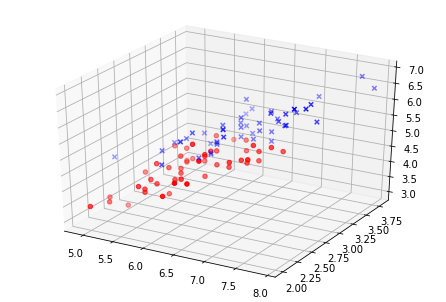

In [20]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep  7 17:49:07 2019

@author: Sumail
"""

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df1 = df[50:100]
df2 = df[100:150]
df = pd.concat([df1,df2])
print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 1, 2]].values

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:50, 0], X[:50, 1], X[:50, 2],c = 'red', marker='o', label='versicolor')
ax.scatter(X[50:100, 0], X[50:100, 1], X[50:100, 2],c = 'blue', marker='x', label='virginica')
'''
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='versicolor')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

#plt.savefig('images/02_06.png', dpi=300)'''
plt.show()

## Step 8-Three Features Training of Perceptron and Adaline

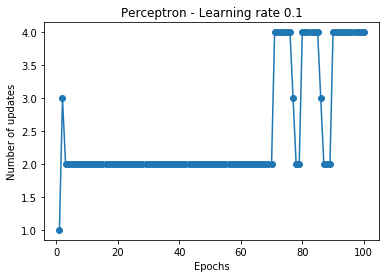

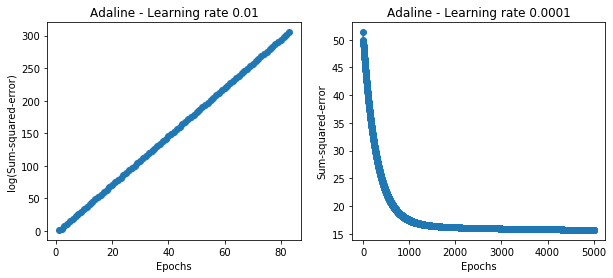

In [27]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep  7 17:59:04 2019

@author: Sumail
"""
import Perceptron 
import matplotlib.pyplot as plt
import numpy as np
import AdalineGD
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df1 = df[50:100]
df2 = df[100:150]
df = pd.concat([df1,df2])
#print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 1, 2]].values
ppn = Perceptron.Perceptron(eta=0.1, n_iter=100)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron - Learning rate 0.1')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD.AdalineGD(n_iter=1000, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD.AdalineGD(n_iter=5000, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

## Step 9-Four Features Training of Perceptron and Adaline

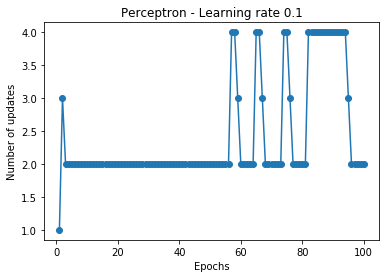

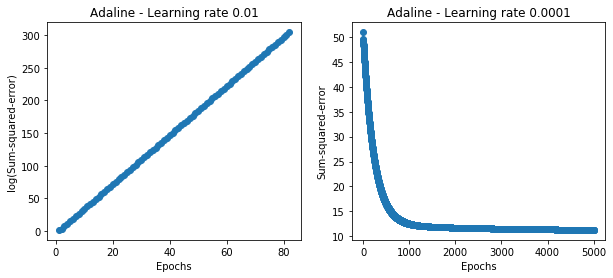

In [30]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep  7 17:59:04 2019

@author: Sumail
"""
import Perceptron 
import matplotlib.pyplot as plt
import numpy as np
import AdalineGD
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df1 = df[50:100]
df2 = df[100:150]
df = pd.concat([df1,df2])
#print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 1, 2, 3]].values
ppn = Perceptron.Perceptron(eta=0.1, n_iter=100)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron - Learning rate 0.1')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD.AdalineGD(n_iter=5000, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD.AdalineGD(n_iter=5000, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

# Step 10-Result

### 1(1).Perception and Adaline are classifiers for binary classification. When the data for two species are linearly separable, They both have good performances. However, when it comes to the data for two species that are NOT linearly separable, the shortcoming of the Perceptron appears that it cannot deal with the linearly inseparable data. During the training process, Perceptron has not been updated at all, it keeps the initial state. Compared to the Perceptron, Adaline have good performance in dealing with both linearly separable data and linearly inseparable data.

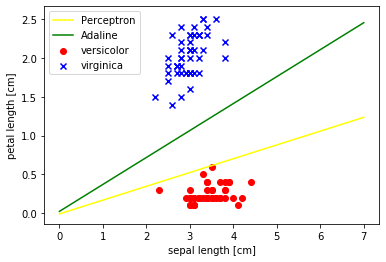

In [24]:
from IPython.display import Image
Image(filename='./MyImages/01_04.png')

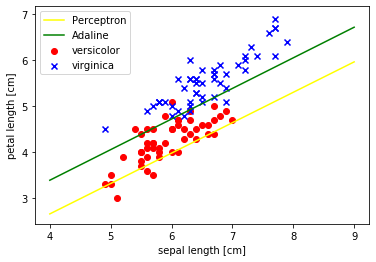

In [23]:
from IPython.display import Image
Image(filename='./MyImages/01_03.png')

### 1(2). Compared to the data that are linearly separable, it always takes more epochs for the model to converge for the data that are NOT linearly separable

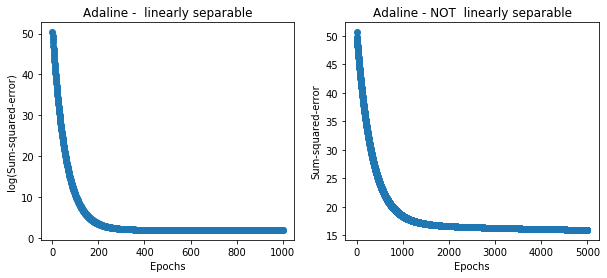

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep 15 21:10:48 2019

@author: Sumail
"""
import matplotlib.pyplot as plt
import numpy as np
import AdalineGD
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df3 = df[50:150]
df1 = df[0:50]
df2 = df[100:150]
df = pd.concat([df1,df2])
#print(df[40:60])
y1 = df.iloc[0:100, 4].values
y1 = np.where(y1 == 'Iris-setosa', -1, 1)
y2 = df3.iloc[0:100, 4].values
y2 = np.where(y2 == 'Iris-versicolor', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [1,3]].values
X1 = df3.iloc[0:100, [0,2]].values
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD.AdalineGD(n_iter=1000, eta=0.0001).fit(X, y1)
ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline -  linearly separable')

ada2 = AdalineGD.AdalineGD(n_iter=5000, eta=0.0001).fit(X1, y2)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - NOT  linearly separable')



# plt.savefig('images/02_11.png', dpi=300)
plt.show()

### 2(1).As for Adaline, learning rate plays an important role. The selection of appropriate learning rate will leads to a successful and valid training model. However, the choice of the learning rate for Perceptron is usually not important.

### (2). The training epochs of Adaline are more than Perceptron's. Because the Perception found a line that correctly classified all of the training data that it was given during the training of the model.The Adaline model on the other hand, found the line that minimized a continuous cost function for the training data.

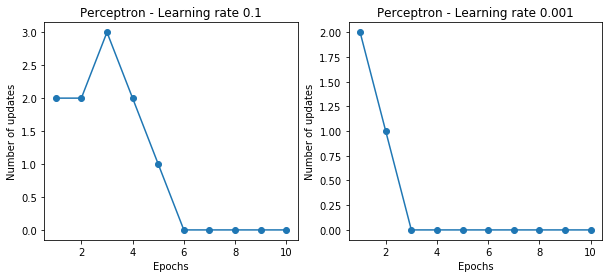

In [48]:
from IPython.display import Image
Image(filename='./MyImages/02_01.png')

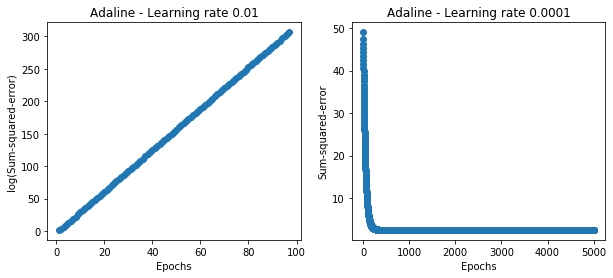

In [26]:
from IPython.display import Image
Image(filename='./MyImages/02_02.png')

### 3. When the number of features is different, each epoch learning speed is also different. The larger the number of features, the faster each epoch learns and the faster the loss value decreases.

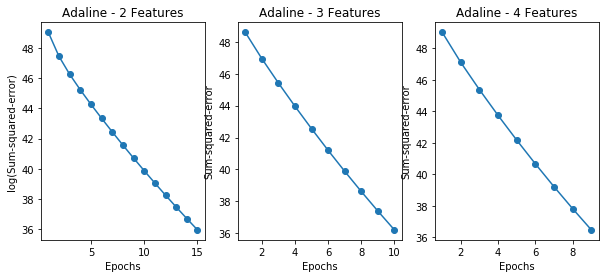

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep 14 16:00:38 2019

@author: Sumail
"""
import matplotlib.pyplot as plt
import numpy as np
import AdalineGD
import pandas as pd
import time

df = pd.read_csv('iris.data', header=None)
df1 = df[0:50]
df2 = df[50:100]
df = pd.concat([df1,df2])
#print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0,2]].values
X1 = df.iloc[0:100, [0,1,2]].values
X2 = df.iloc[0:100, [0,1,2,3]].values
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

ada1 = AdalineGD.AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - 2 Features')

ada2 = AdalineGD.AdalineGD(n_iter=10, eta=0.0001).fit(X1, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - 3 Features')


ada3 = AdalineGD.AdalineGD(n_iter=9, eta=0.0001).fit(X2, y)
ax[2].plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline - 4 Features')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

###  4.After standardizing the input data, I found that the model can learn with a larger learning rate, which increases the learning speed. I chose 0.01 as learning rate to train the model. When using raw data, a valid model cannot be obtained because the learning rate is too large. When using standardized data, we can get a valid model.

Text(0.5, 1.0, 'Standard Input - Learning rate 0.01')

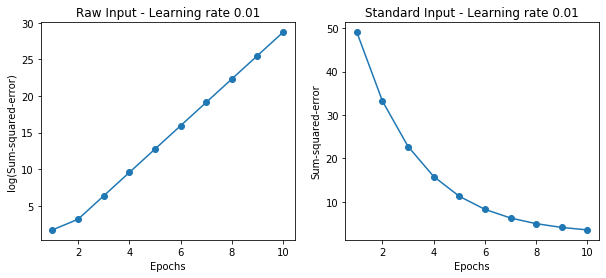

In [51]:
import Perceptron 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import AdalineGD
import AdalineSGD
import pandas as pd
df = pd.read_csv('iris.data', header=None)
df1 = df[0:50]
df2 = df[50:100]
df = pd.concat([df1,df2])
#print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

X = df.iloc[0:100, [0,2]].values
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD.AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Raw Input - Learning rate 0.01')

ada2 = AdalineGD.AdalineGD(n_iter=10, eta=0.01).fit(X_std, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Standard Input - Learning rate 0.01')

###  5.We use Stochastic Gradient Descent and Gradient Descent.  In GD, it has to run through ALL the samples in your training set, while in SGD, it uses ONLY ONE or SUBSET of training sample from your training set. Thus, if the number of training samples are large, campared to GD, SGD will be faster.

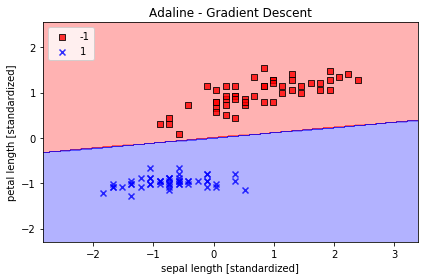

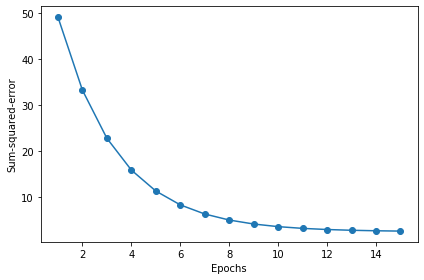

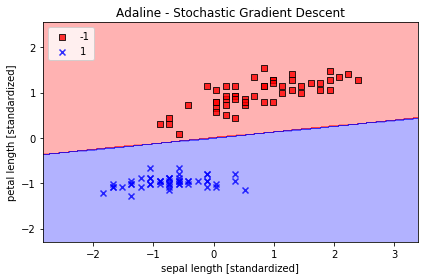

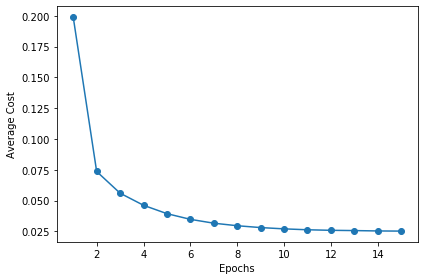

In [47]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep 14 15:18:08 2019

@author: Sumail
"""

import Perceptron 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import AdalineGD
import AdalineSGD
import pandas as pd
df = pd.read_csv('iris.data', header=None)
df1 = df[0:50]
df2 = df[50:100]
df = pd.concat([df1,df2])
#print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

# extract sepal length and petal length
X = df.iloc[0:100, [0,2]].values
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada = AdalineGD.AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

ada = AdalineSGD.AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()
